In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
#sns.set_style("whitegrid")


### BI-VARIATE

In [4]:
df=pd.read_excel("Superstore_USA.xlsx")


In [5]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [6]:
df.Sales

0          5.90
1         13.01
2         49.92
3         41.64
4       1446.67
         ...   
9421     447.87
9422      13.23
9423    2215.93
9424     506.50
9425     172.48
Name: Sales, Length: 9426, dtype: float64

In [7]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

## Bi-Variat KDEs 

## Sales vs Profit`

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

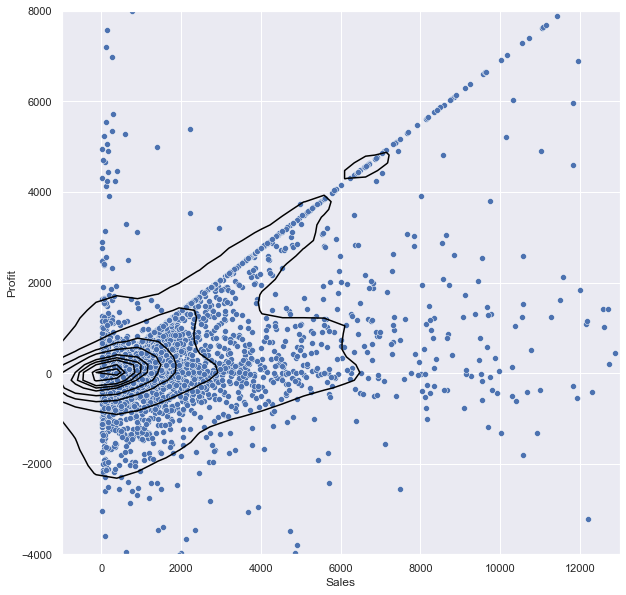

In [8]:
fig = plt.figure(figsize=(10,10))
plt.ylim(-4000,8000)
plt.xlim(-1000,13000)
sns.scatterplot(df.Sales,df.Profit)
sns.kdeplot(df.Sales,df.Profit,color="black")

In [9]:
df.Sales.unique(),df.Profit.unique()

(array([   5.9 ,   13.01,   49.92, ..., 2215.93,  506.5 ,  172.48]),
 array([    1.32      ,     4.56      ,   -47.64      , ...,
        -1225.02909672,   349.485     ,    78.0624    ]))

In [10]:
df[["Sales","Profit"]].head(10)

,Sales,Profit
0,5.90,1.3200
1,13.01,4.5600
2,49.92,-47.6400
3,41.64,-30.5100
4,1446.67,998.2023
5,2011.67,1388.0523
6,1451.37,1001.4453
7,6362.85,4390.3665
8,113.25,-141.2600
9,1515.17,1045.4673


##### this here shows clear linear line b/w these two values,as the values of sales increased the is decent rise in the profit too,even before the increasing values of sales there might be some item or reason that profits are hiked in start whhich we'll analyze later

### PROFIT ON  VARIOUS PRICES 


<AxesSubplot:xlabel='Unit Price', ylabel='Profit'>

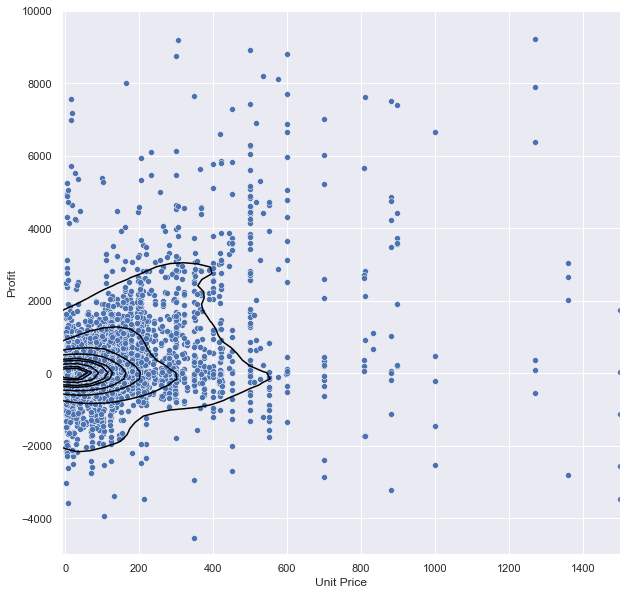

In [11]:
fig = plt.figure(figsize=(10,10))
plt.ylim(-5000,10000)
plt.xlim(-10,1500)
sns.scatterplot(df["Unit Price"],df.Profit)
sns.kdeplot(df["Unit Price"],df.Profit,color="black")


### SALES ON  VARIOUS PRICES 


<AxesSubplot:xlabel='Unit Price', ylabel='Sales'>

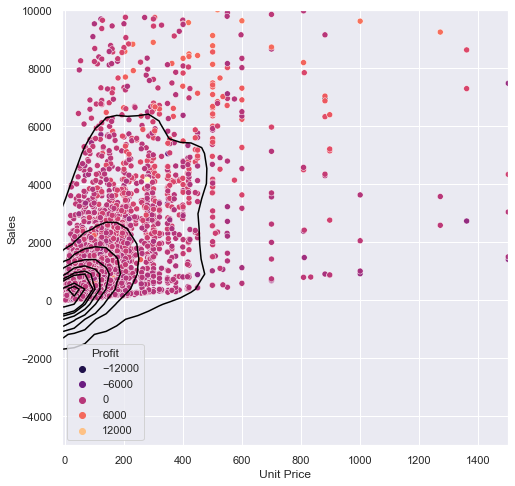

In [12]:
sns.color_palette("magma",as_cmap=True)
fig = plt.figure(figsize=(8,8))
plt.ylim(-5000,10000)
plt.xlim(-10,1500)
sns.scatterplot(df["Unit Price"],df.Sales,hue=df.Profit, palette=("magma"),cmap=True)
sns.kdeplot(df["Unit Price"],df.Sales,color="black")


##### The graph clearly shows the density of price towards the increasing of it ,there are more sales(existence of data)towards less prices of items ,which can later help us to identify the sales on different categories and prices

# scatterplot b/w price and profit with the hue of product category

<AxesSubplot:xlabel='Unit Price', ylabel='Profit'>

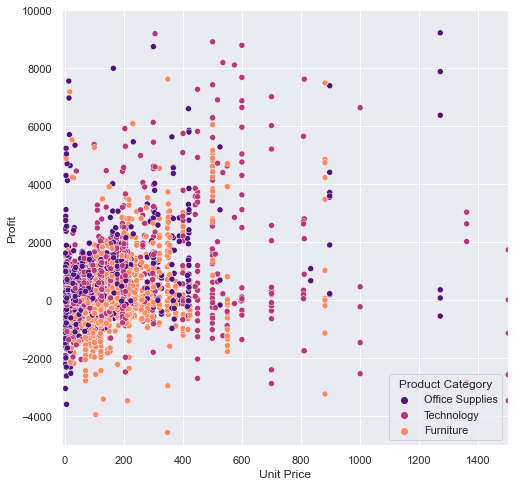

In [13]:
sns.color_palette("magma",as_cmap=True)
fig = plt.figure(figsize=(8,8))
plt.ylim(-5000,10000)
plt.xlim(-10,1500)
sns.scatterplot(df["Unit Price"],df.Profit,hue=df['Product Category'], palette=("magma"),cmap=True)
#sns.kdeplot(df["Unit Price"],df.Sales,color="black")


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

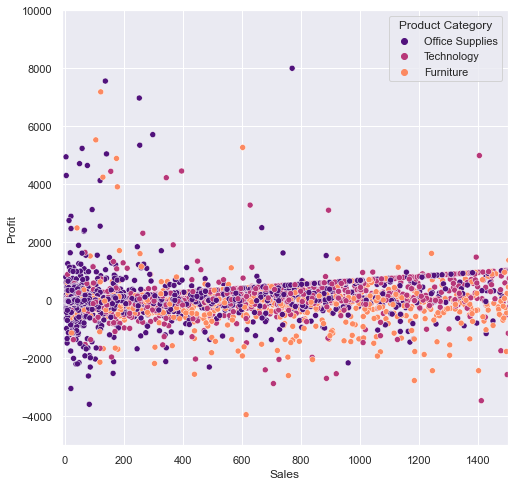

In [14]:
sns.color_palette("magma",as_cmap=True)
fig = plt.figure(figsize=(8,8))
plt.ylim(-5000,10000)
plt.xlim(-10,1500)
sns.scatterplot(df.Sales,df.Profit,hue=df['Product Category'], palette=("magma"),cmap=True)
#sns.kdeplot(df["Unit Price"],df.Sales,color="black")


In [20]:
df['Product Category'].value_counts().keys()[:2]


Index(['Office Supplies', 'Technology'], dtype='object')

In [25]:
df[(df['Product Category']=='Office Supplies') | (df['Product Category']=='Technology')]

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,23414,Critical,0.02,37.44,4.27,3400,Florence Gold,Regular Air,Corporate,Office Supplies,...,East,West Virginia,Fairmont,26554,2013-04-27,2013-04-30,-15.0300,1,43.90,87546
9419,24912,Medium,0.05,35.99,1.25,3400,Florence Gold,Regular Air,Small Business,Technology,...,East,West Virginia,Fairmont,26554,2013-10-04,2013-10-05,411.4815,19,596.35,87549
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,2013-05-14,2013-05-15,137.8600,13,447.87,87532
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,2013-05-14,2013-05-14,-39.0700,3,13.23,87532


# top 2 product category graph :
    

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

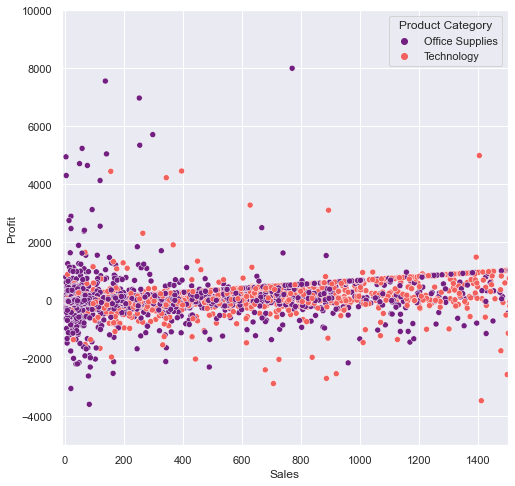

In [34]:
sns.color_palette("magma",as_cmap=True)
fig = plt.figure(figsize=(8,8))
plt.ylim(-5000,10000)
plt.xlim(-10,1500)
sns.scatterplot("Sales","Profit",hue='Product Category',data=df[df['Product Category'].isin(['Office Supplies','Technology'])], palette=("magma"),cmap=True)
#sns.kdeplot(df["Unit Price"],df.Sales,color="black")


### REGION WITH THE MOST PROFITS

<AxesSubplot:xlabel='Region', ylabel='Profit'>

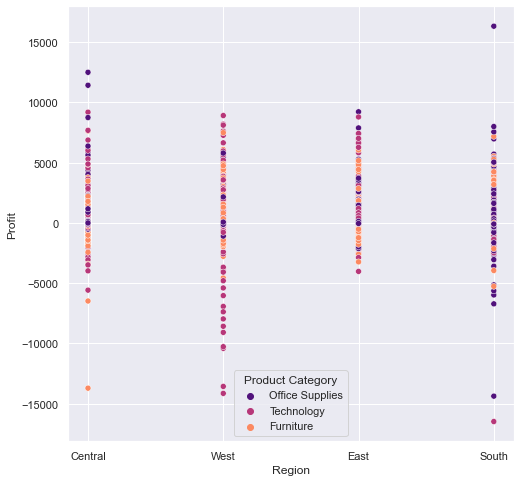

In [37]:
sns.color_palette("magma",as_cmap=True)
fig = plt.figure(figsize=(8,8))
#plt.ylim(-5000,10000)
#plt.xlim(-10,1500)
sns.scatterplot("Region","Profit",hue='Product Category',data=df, palette=("magma"),cmap=True)
#sns.kdeplot(df["Unit Price"],df.Sales,color="black")


## REGION WITH MOST SALES

<AxesSubplot:xlabel='Region', ylabel='Sales'>

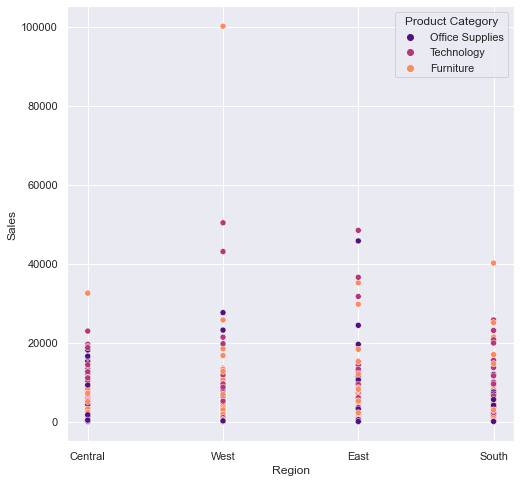

In [38]:
sns.color_palette("magma",as_cmap=True)
fig = plt.figure(figsize=(8,8))
#plt.ylim(-5000,10000)
#plt.xlim(-10,1500)
sns.scatterplot("Region","Sales",hue='Product Category',data=df, palette=("magma"),cmap=True)
#sns.kdeplot(df["Unit Price"],df.Sales,color="black")


##### Sales in west and east are more spread accross the higher values than the other two regions

## CITIES AND THEIR PROFIT

In [66]:
cities=df["City"].value_counts().keys()[:20].values.tolist()
cities

['New York City',
 'Los Angeles',
 'Seattle',
 'Chicago',
 'Boston',
 'Washington',
 'Philadelphia',
 'Miami',
 'Charlotte',
 'Houston',
 'Detroit',
 'Atlanta',
 'Dallas',
 'San Francisco',
 'San Diego',
 'Columbus',
 'Springfield',
 'Auburn',
 'Roswell',
 'Marion']

In [67]:
city=[]
city=pd.DataFrame(city)
for i in cities:
    city=pd.concat([city,df[df["City"]==i]])

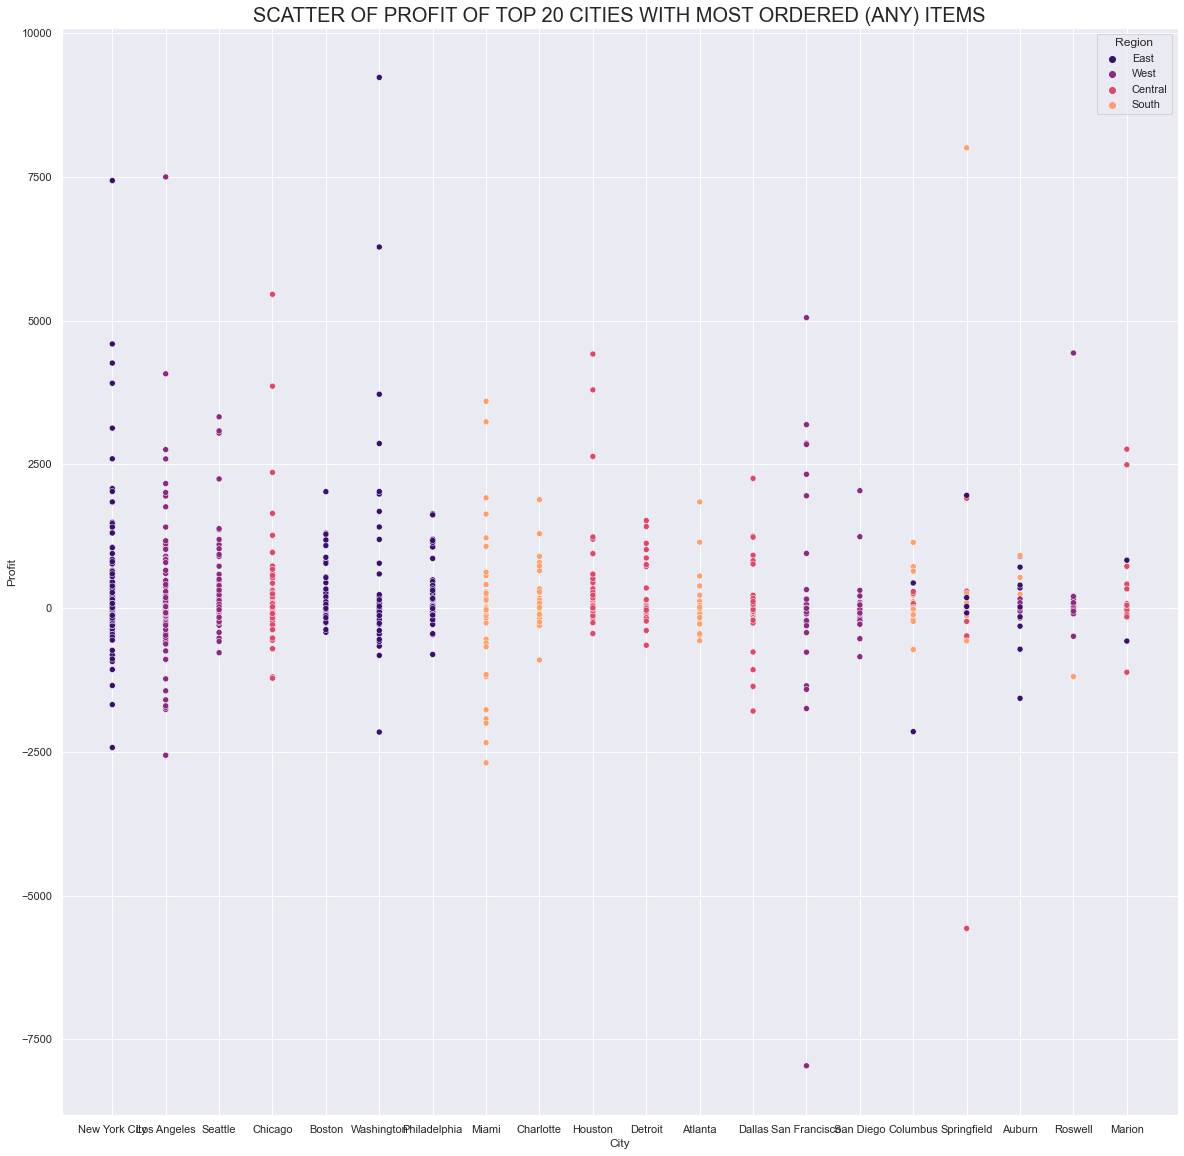

In [71]:

sns.color_palette("magma",as_cmap=True)
fig = plt.figure(figsize=(20,20))
plt.title("SCATTER OF PROFIT OF TOP 20 CITIES WITH MOST ORDERED (ANY) ITEMS", fontsize = 20)
#plt.ylim(-5000,10000)
#plt.xlim(-10,1500)
sns.scatterplot("City","Profit",hue="Region",data=city, palette=("magma"),cmap=True)
#sns.kdeplot(df["Unit Price"],df.Sales,color="black")
plt.show()

New York has most bought items with the most profits above 2000 in the region of east